In [18]:
%pip install yfinance
%pip install pandas
%pip install numpy
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [8]:
petr3 = yf.download('PETR3.SA', start='2010-01-01')['Adj Close']
petr4 = yf.download('PETR4.SA', start='2010-01-01')['Adj Close']
print(petr3)
print(petr4)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Date
2010-01-04    14.673960
2010-01-05    14.585889
2010-01-06    14.730333
2010-01-07    14.642251
2010-01-08    14.533032
                ...    
2023-07-31    34.810001
2023-08-01    34.080002
2023-08-02    33.840000
2023-08-03    34.320000
2023-08-04    32.880001
Name: Adj Close, Length: 3374, dtype: float64
Date
2010-01-04    11.541965
2010-01-05    11.443001
2010-01-06    11.597635
2010-01-07    11.489391
2010-01-08    11.427536
                ...    
2023-07-31    31.110001
2023-08-01    30.600000
2023-08-02    30.530001
2023-08-03    30.920000
2023-08-04    30.000000
Name: Adj Close, Length: 3374, dtype: float64


In [9]:
petr3_df = pd.DataFrame(petr3, columns=["Adj Close"])
petr3_df.rename(columns={'Adj Close':'PETR3'}, inplace=True)
petr4_df = pd.DataFrame(petr4, columns=["Adj Close"])
petr4_df.rename(columns={'Adj Close':'PETR4'}, inplace=True)
spread_df = pd.concat([petr3_df, petr4_df], axis=1)
spread_df

,PETR3,PETR4
Date,,
2010-01-04,14.673960,11.541965
2010-01-05,14.585889,11.443001
2010-01-06,14.730333,11.597635
2010-01-07,14.642251,11.489391
2010-01-08,14.533032,11.427536
...,...,...
2023-07-31,34.810001,31.110001
2023-08-01,34.080002,30.600000
2023-08-02,33.840000,30.530001


In [13]:
spread_df['spread'] = round(spread_df.PETR4/spread_df.PETR3,3)
spread_df

,PETR3,PETR4,spread
Date,,,
2010-01-04,14.673960,11.541965,0.787
2010-01-05,14.585889,11.443001,0.785
2010-01-06,14.730333,11.597635,0.787
2010-01-07,14.642251,11.489391,0.785
2010-01-08,14.533032,11.427536,0.786
...,...,...,...
2023-07-31,34.810001,31.110001,0.894
2023-08-01,34.080002,30.600000,0.898
2023-08-02,33.840000,30.530001,0.902


<Axes: xlabel='Date'>

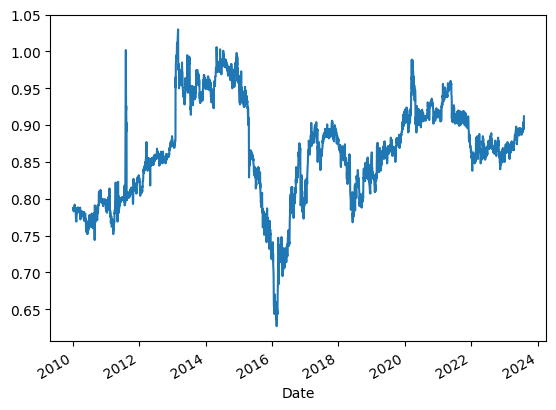

In [14]:
spread_df.spread.plot()

In [17]:
media_spread = round(np.mean(spread_df.spread),3)
sd1_min_spread = media_spread - round(np.std(spread_df.spread),3)
sd1_max_spread = media_spread + round(np.std(spread_df.spread),3)
sd2_min_spread = media_spread - (2* (round(np.std(spread_df.spread),3)))
sd2_max_spread = media_spread + (2* (round(np.std(spread_df.spread),3)))

In [21]:
fig01 = px.line(spread_df, x=spread_df.index, y=spread_df.spread)

fig01.add_hline(y=media_spread, line_width=5, line_color="green")
fig01.add_hline(y=sd1_min_spread, line_width=3, line_dash="dash", line_color="orange")
fig01.add_hline(y=sd1_max_spread, line_width=3, line_dash="dash", line_color="orange")
fig01.add_hline(y=sd2_min_spread, line_width=5, line_dash="dash", line_color="red")
fig01.add_hline(y=sd2_max_spread, line_width=5, line_dash="dash", line_color="red")
fig01.show()